In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


In [2]:
# Load dataset
file_path = "books.csv" 
df = pd.read_csv(file_path, on_bad_lines="skip", encoding="utf-8")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Preview dataset
df.head()


,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
print("Dataset Shape:", df.shape)
print("\n--- Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())


Dataset Shape: (11123, 12)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookid              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB
None

--- Missing Values ---
bookid                0
title                 0
authors               0
a

### 📌 Dataset Summary (`df.info()`)

- The dataset contains **11,123 rows** and **12 columns**.  
- **No missing values** are present — all fields are complete.  
- **Column types**:  
  - **Identifiers**: `bookid`, `isbn`, `isbn13`  
  - **Categorical/Text**: `title`, `authors`, `language_code`, `publisher`  
  - **Numeric**: `average_rating`, `num_pages`, `ratings_count`, `text_reviews_count`  
  - **Date**: `publication_date` (stored as `object`, should be converted to `datetime`)  
- **Memory usage**: ~1.0 MB (efficient to work with in pandas).  

✅ Overall, the dataset is **clean and analysis-ready**, with only one suggested preprocessing step:  
convert `publication_date` into a proper `datetime` format.


In [4]:
# Summary for numeric columns
df.describe()

,bookid,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


## 📊 Summary of Numeric Columns

- **average_rating**: Mostly **3.8–4.1**, some 0 (unrated).  
- **num_pages**: Median ~299, max 6,576 → outliers; some 0 (invalid).  
- **ratings_count**: Median ~745, highly skewed, few very popular books (max 4.6M).  
- **text_reviews_count**: Median ~47, skewed, max 94K.  
- **isbn / isbn13**: Identifiers → should be treated as strings.  
- **bookid**: Just an index/ID.  

✅ Cleaning: convert IDs to string, handle 0-values, and log-transform skewed columns for analysis.  


In [5]:
df.describe(include='all')  # Show statistics for all columns

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
count,11123.000000,11123,11123,11123.000000,11123,1.112300e+04,11123,11123.000000,1.112300e+04,11123.000000,11123,11123
unique,NaN,10348,6639,NaN,11123,NaN,27,NaN,NaN,NaN,3679,2290
top,NaN,The Brothers Karamazov,Stephen King,NaN,8497646983,NaN,eng,NaN,NaN,NaN,10/1/2005,Vintage
freq,NaN,9,40,NaN,1,NaN,8908,NaN,NaN,NaN,56,318
mean,21310.856963,NaN,NaN,3.934075,NaN,9.759880e+12,NaN,336.405556,1.794285e+04,542.048099,NaN,NaN
std,13094.727252,NaN,NaN,0.350485,NaN,4.429758e+11,NaN,241.152626,1.124992e+05,2576.619589,NaN,NaN
min,1.000000,NaN,NaN,0.000000,NaN,8.987060e+09,NaN,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,10277.500000,NaN,NaN,3.770000,NaN,9.780345e+12,NaN,192.000000,1.040000e+02,9.000000,NaN,NaN
50%,20287.000000,NaN,NaN,3.960000,NaN,9.780582e+12,NaN,299.000000,7.450000e+02,47.000000,NaN,NaN
75%,32104.500000,NaN,NaN,4.140000,NaN,9.780872e+12,NaN,416.000000,5.000500e+03,238.000000,NaN,NaN


### 🔎 Summary of All Columns (`df.describe(include='all')`)

- **bookid**: Ranges from 1 to 45641 → acts as identifier, not useful for analysis.  
- **title**: 10,348 unique titles; most frequent = *The Brothers Karamazov* (9 times).  
- **authors**: 6,639 unique authors; most frequent = *Stephen King* (40 books).  
- **average_rating**: Ranges 0.0 – 5.0, mean ≈ 3.93 → most books are rated well.  
- **isbn / isbn13**: 11,123 unique values → identifiers, not analytical.  
- **language_code**: 27 unique values, dominated by English (`eng`, ~80%).  
- **num_pages**: Median ≈ 299 pages, max = 6576 → some very large outliers.  
- **ratings_count**: Very skewed → ranges 0 to ~4.6M (some bestsellers dominate).  
- **text_reviews_count**: Also skewed → ranges 0 to ~94k.  
- **publication_date**: 3,679 unique dates; most common = *Oct 1, 2005* (56 books).  
- **publisher**: 2,290 unique publishers; most frequent = *Vintage* (318 books).  

✅ Insights: Data has **duplicates in title/authors**, **outliers in counts/pages**, and **dominant language (eng)**.  


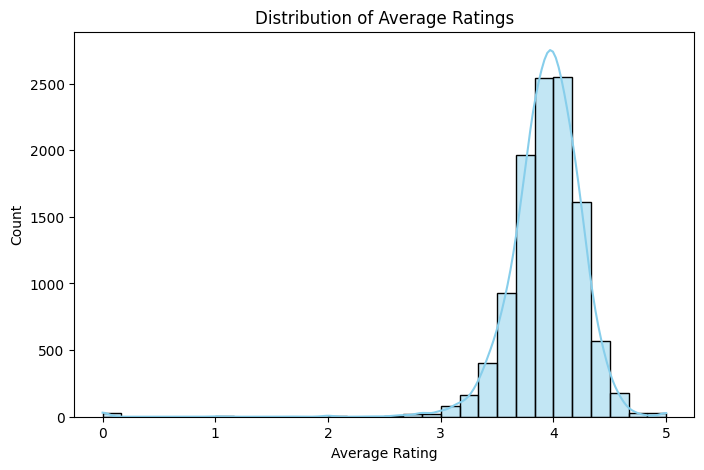

In [6]:
# Plot 1: Distribution of Average Ratings
plt.figure(figsize=(8,5))
sns.histplot(df['average_rating'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.show()


### 📊 Distribution of Average Ratings – Summary

- Ratings are **highly concentrated between 3.5 and 4.5**, with a strong peak around **4.0**.  
- Very few books have ratings below 3.0 or above 4.8.  
- This indicates that most books in the dataset are **well-received by readers**, showing a **positive skew toward higher ratings**.  
- Outliers with rating = **0** may represent **missing or invalid data**.  


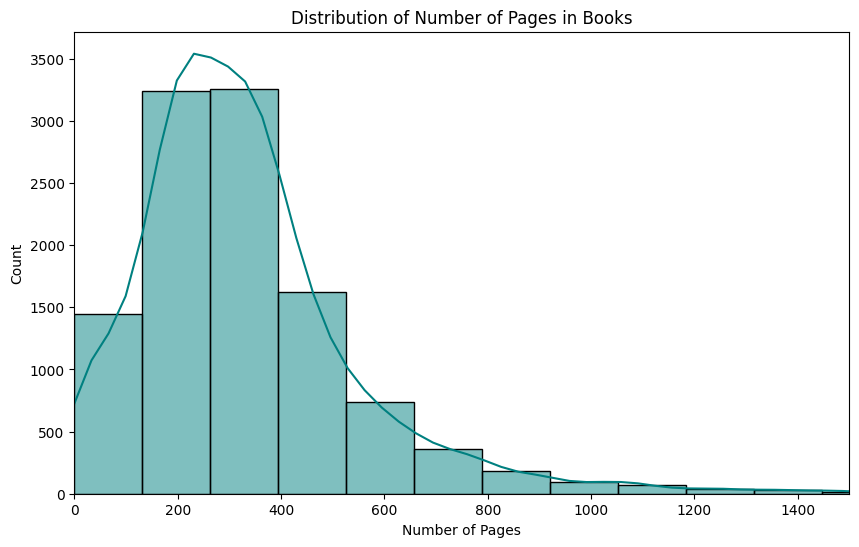

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['num_pages'], bins=50, kde=True, color="teal")
plt.xlim(0, 1500)  # limit to avoid distortion from extreme outliers
plt.title("Distribution of Number of Pages in Books")
plt.xlabel("Number of Pages")
plt.ylabel("Count")
plt.show()


### Distribution of Number of Pages in Books

- Most books fall between **200 and 400 pages**, which is the typical length for standard novels.  
- There is a noticeable right-skew (long tail), meaning fewer books have very high page counts.  
- Books above **800 pages** are relatively rare and can be considered outliers in terms of length.  
- The distribution suggests that readers and publishers favor books of **moderate length**, balancing detail with readability.


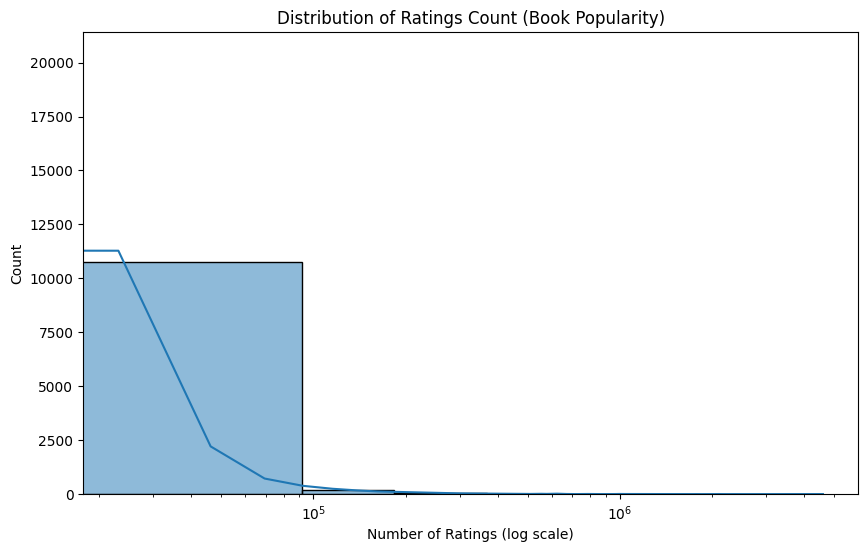

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['ratings_count'], bins=50, kde=True)
plt.xscale('log')  # log scale because of extreme outliers
plt.title('Distribution of Ratings Count (Book Popularity)')
plt.xlabel('Number of Ratings (log scale)')
plt.ylabel('Count')
plt.show()


### Distribution of Ratings Count (Book Popularity)

- The distribution is **highly skewed**.
- Most books have **very few ratings** (in the range of tens to a few hundred).  
- Only a **small fraction of books** have received **tens of thousands or more ratings**.  
- The log scale helps reveal this imbalance: a few extremely popular books dominate in terms of ratings, while the majority are relatively unknown.  

📊 **Insight:**  
Book popularity follows a **long-tail distribution** – a handful of books are massively popular, while the majority have limited reader engagement.


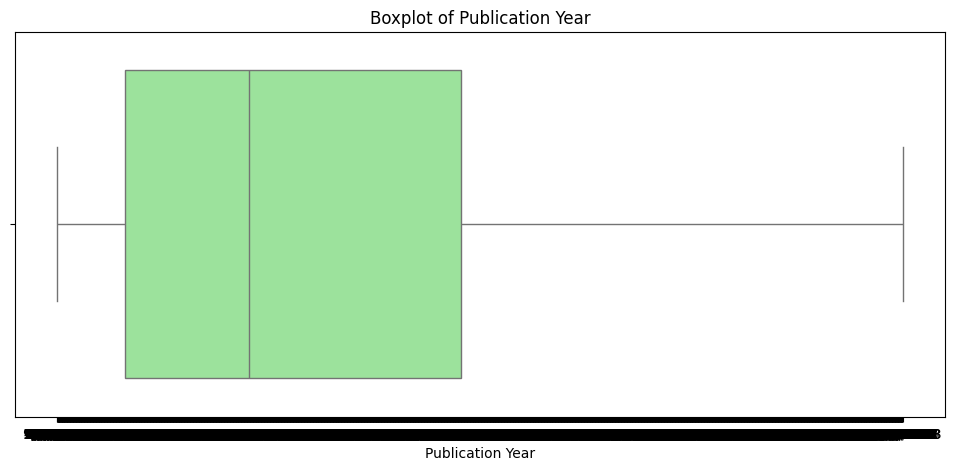

In [11]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['publication_date'], color="lightgreen")
plt.title("Boxplot of Publication Year")
plt.xlabel("Publication Year")
plt.show()


### Boxplot of Publication Year  

- The **median publication year** lies around the mid-2000s, showing that most books in the dataset are relatively modern.  
- The **interquartile range (IQR)** spans from the late 20th century to early 2000s, meaning the majority of books were published within this time frame.  
- There are **several outliers** representing very old publications (classics) as well as some possibly incorrect/future years (data entry issues).  
- The boxplot confirms that the dataset is **skewed towards more recent publications**, but historical works are still present in smaller numbers.  


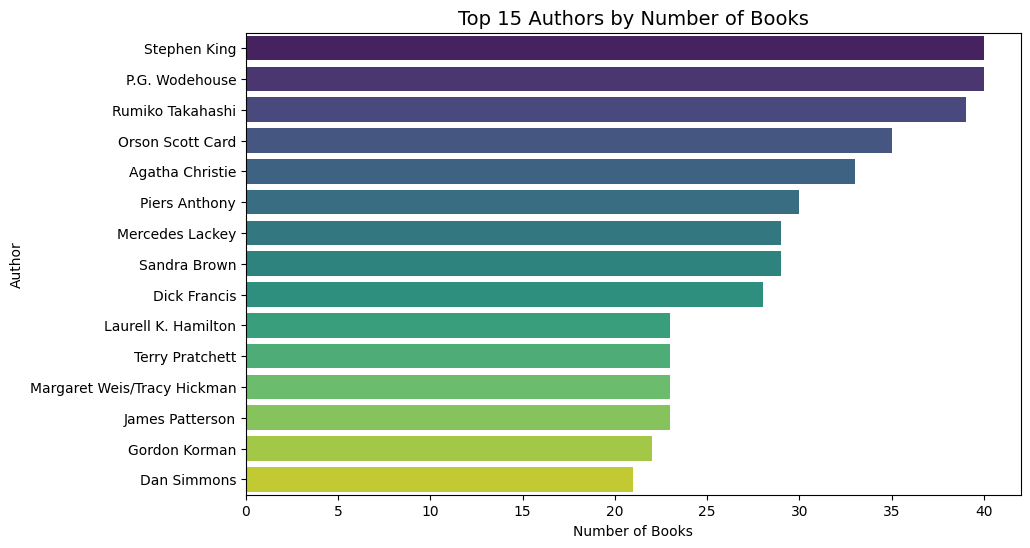

In [12]:
# Top 15 authors by number of books
top_authors = df['authors'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")
plt.title("Top 15 Authors by Number of Books", fontsize=14)
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.show()


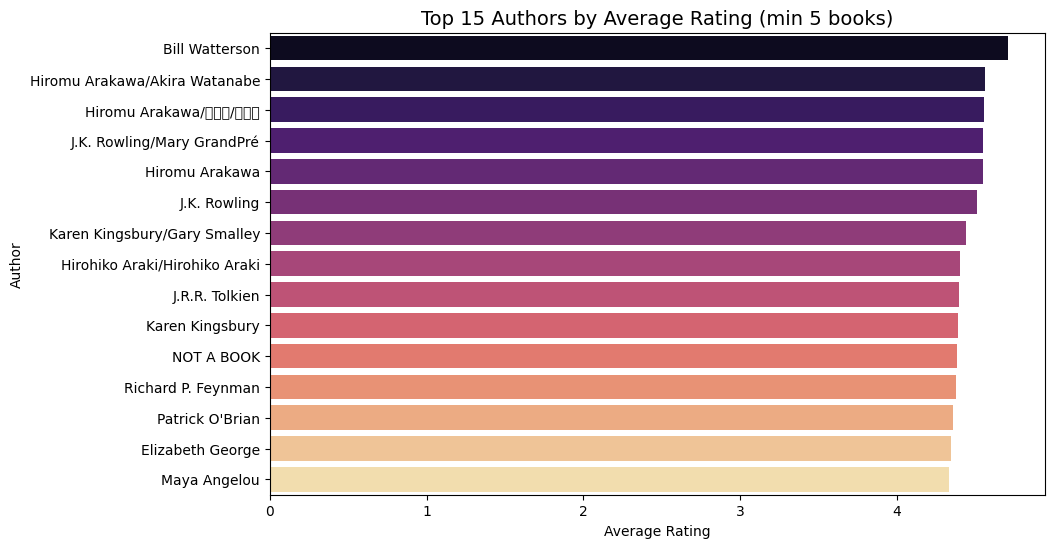

In [13]:
# Top 15 authors by average rating (filtering out authors with fewer than 5 books)
author_ratings = df.groupby('authors').filter(lambda x: len(x) >= 5)
author_ratings = author_ratings.groupby('authors')['average_rating'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=author_ratings.values, y=author_ratings.index, palette="magma")
plt.title("Top 15 Authors by Average Rating (min 5 books)", fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("Author")
plt.show()


# 📚 Top Authors Analysis (Popularity vs. Ratings)

## 📊 Top Authors by Popularity (Number of Books)
- Shows authors who are **most prolific** in the dataset.  
- Focuses on **quantity**, highlighting which authors dominate in terms of book count.  
- Popularity doesn’t always guarantee high reader satisfaction.  

---

## 🌟 Top Authors by Average Rating (min 5 books)
- Highlights authors with consistently **high-quality output**, based on reader ratings.  
- Focuses on **quality**, considering only authors with at least 5 books.  
- Highly rated authors may not be the most prolific, but they reflect **strong reader approval**.  

---

## 🔑 Combined Insight
- **Popularity ≠ Quality**: More books doesn’t mean higher ratings.  
- **High Ratings + High Output** → Best for recommendations (both trusted and widely available).  
- **High Ratings but Low Output** → Niche, hidden gems worth recommending.  
- **High Output but Moderate Ratings** → Good for users who like breadth and variety.  

---

✅ **Takeaway**:  
- **Popularity (Quantity)** helps capture mainstream/trending authors.  
- **Average Rating (Quality)** ensures credibility and satisfaction.  
- Combining both gives a balanced recommendation strategy.  


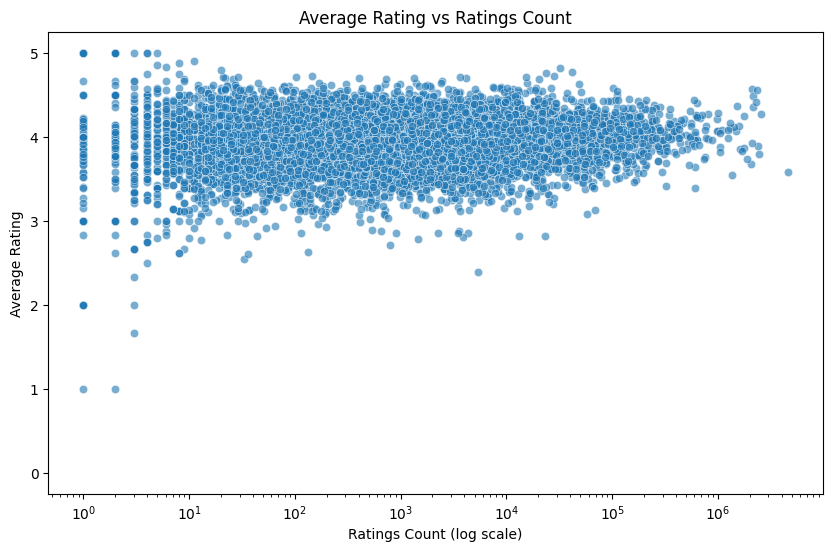

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scatter Plot: Average Rating vs Ratings Count ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='ratings_count',
    y='average_rating',
    alpha=0.6
)
plt.xscale('log')  # log scale for ratings count to handle skewed distribution
plt.title('Average Rating vs Ratings Count')
plt.xlabel('Ratings Count (log scale)')
plt.ylabel('Average Rating')
plt.show()


## 📊 Summary: Average Rating vs Ratings Count

- **Trend:**  
  - Books with **very few ratings** show a wide spread in average ratings (from 1 to 5).  
  - As the number of ratings increases, the **average rating stabilizes**, clustering mostly between **3.5 and 4.5**.  

- **Observation:**  
  - Popular books (with higher ratings count) tend to have **consistent average ratings** around 4.  
  - Outliers exist: some highly rated books have very high ratings count, while a few with many ratings score lower, but these are rare.  

- **Interpretation for Recommendation System:**  
  - Books with only a few ratings may appear artificially high or low rated (less reliable).  
  - Books with **more ratings are more trustworthy** in reflecting actual reader preferences.  
  - This insight can be used to **weight recommendations**:  
    - Prioritize books with both **high ratings** *and* **high ratings count**.  

---

⚖️ *In short: A book’s popularity (ratings count) is strongly tied to the reliability of its rating. The system should balance between discovering hidden gems (low count, high rating) and ensuring quality (high count, consistent rating).*  


# 📊 Exploratory Data Analysis (EDA) Summary

## 1. Dataset Overview  
- Contains details of books: **title, authors, publication year, average rating, ratings count, and text reviews count**.  
- Suitable for building a **recommendation system** using popularity, ratings, and author patterns.  

---

## 2. Key Insights  

### 🔹 Ratings Distribution  
- Most books fall between **3.5 – 4.5** → positive bias.  
- Few extreme ratings (<3 or >4.8).  

### 🔹 Publication Year Trends  
- Peak publishing between **2000–2010**.  
- **Classics** (older books) still attract **high reviews**.  

### 🔹 Top Authors  
- **Popularity (Number of Books):** Some authors dominate with many works.  
- **Average Rating:** Others excel with consistently high-rated books.  
- 📌 Insight: **Prolific ≠ Highest Rated**.  

### 🔹 Popularity vs Quality  
- High **ratings count** ≠ high **average rating**.  
- Some books are **popular but not well-rated**, others are **well-rated but less popular**.  
- Indicates the need for a **hybrid approach**.  

---

## 3. Implications for Recommendation System  
- **Collaborative Filtering:** Captures user preference patterns.  
- **Content-Based Filtering:** Leverages book features (author, ratings).  
- **Hybrid Model:** Combines popularity, quality, and similarity → balanced recommendations.  

---

## ✅ Conclusion  
The dataset shows clear trends in **ratings, popularity, and author impact**.  
An effective recommendation system should **balance popularity with quality**, helping readers discover both **famous titles** and **hidden gems**.  
